In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# World Health Organization Standards

# According to WHO standards, a minimum of 3 beds per 1000 people is required. 
# Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. 
# If not, how many facilities are required to fill the gap?

In [ ]:
# Problem Statement 16: (Gap in number of beds)
# Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in 
# each State/UT, as well as at the national level (if any).

In [2]:
df_hsptl = pd.read_csv('CleanData/fine_hospitals.csv')
df_hsptl.head()

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,ANDAMAN AND NICOBAR ISLANDS,27,4,NaN,3,34,1246
1,ANDHRA PRADESH,1417,198,31,20,1666,60799
2,ARUNACHAL PRADESH,122,62,NaN,15,199,2320
3,ASSAM,1007,166,14,33,1220,19115
4,BIHAR,2007,63,33,43,2146,17796


In [3]:
df_hsptl.shape

(37, 7)

In [5]:
# reading cesus dataframe
df_cens = pd.read_csv('CleanData/fine_census.csv')
df_cens.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,LADDAKH,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,LADDAKH,Kargil,140802.0,NaN,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [6]:
# creating temp df with state wise population
df_pop = df_cens.groupby('State/UT').sum()['Population']/1000 #.sort_index()
df_pop = df_pop.reset_index()
df_pop.head()

C:\Users\miles\AppData\Local\Temp\ipykernel_1816\3344583932.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pop = df_cens.groupby('State/UT').sum()['Population']/1000 #.sort_index()


,State/UT,Population
0,ANDAMAN AND NICOBAR ISLANDS,380.581
1,ANDHRA PRADESH,49386.799
2,ARUNACHAL PRADESH,1383.727
3,ASSAM,31205.576
4,BIHAR,104099.452


In [7]:
# adding a new row with india pop 
df_pop.loc[36] =['ALL INDIA',df_pop['Population'].sum()]
df_pop.tail()

,State/UT,Population
32,TELANAGANA,35193.978
33,TRIPURA,3673.917
34,UTTAR PRADESH,199812.341
35,UTTARAKHAND,10086.292
36,ALL INDIA,1209917.771


In [8]:
# taking requered cols from hosptl df
df_hsptl = df_hsptl[['State/UT','Hospitals','HospitalBeds']]
df_hsptl.head()

,State/UT,Hospitals,HospitalBeds
0,ANDAMAN AND NICOBAR ISLANDS,34,1246
1,ANDHRA PRADESH,1666,60799
2,ARUNACHAL PRADESH,199,2320
3,ASSAM,1220,19115
4,BIHAR,2146,17796


In [9]:
# merging the temp population dataframe and hospital dataframe
df_merged =  df_hsptl.merge(df_pop,how='inner',on='State/UT')
df_merged.head()

,State/UT,Hospitals,HospitalBeds,Population
0,ANDAMAN AND NICOBAR ISLANDS,34,1246,380.581
1,ANDHRA PRADESH,1666,60799,49386.799
2,ARUNACHAL PRADESH,199,2320,1383.727
3,ASSAM,1220,19115,31205.576
4,BIHAR,2146,17796,104099.452


In [10]:
df_merged['Required_Beds'] = df_merged['Population'].apply(lambda x: round(x*3))
df_merged.head()

,State/UT,Hospitals,HospitalBeds,Population,Required_Beds
0,ANDAMAN AND NICOBAR ISLANDS,34,1246,380.581,1142
1,ANDHRA PRADESH,1666,60799,49386.799,148160
2,ARUNACHAL PRADESH,199,2320,1383.727,4151
3,ASSAM,1220,19115,31205.576,93617
4,BIHAR,2146,17796,104099.452,312298


In [11]:
# converting data type of hospital beds to int
df_merged['HospitalBeds'] = df_merged['HospitalBeds'].apply(lambda x: int(x.replace(',','')))

<Axes: xlabel='State/UT'>

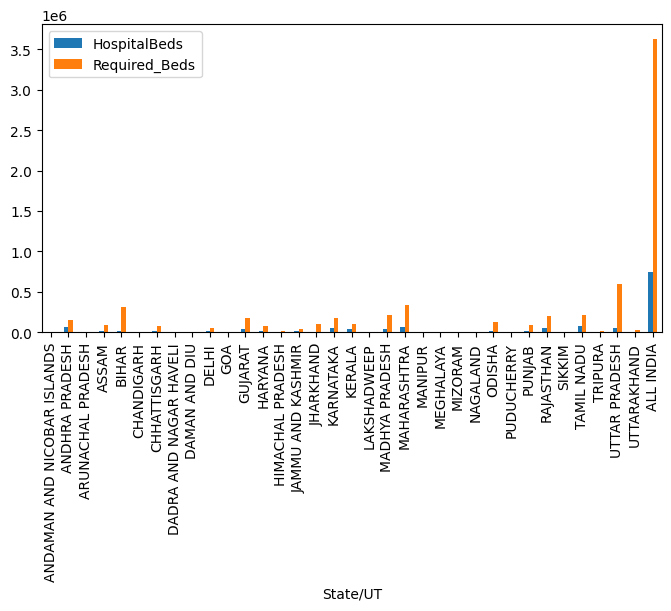

In [12]:
df_merged[['State/UT',"HospitalBeds","Required_Beds"]].iloc[:36].plot(kind='bar',x='State/UT',figsize=(8,4))

In [13]:
df_merged.describe()

,HospitalBeds,Population,Required_Beds
count,35.000000,3.500000e+01,3.500000e+01
mean,40272.200000,6.551689e+04,1.965507e+05
std,123605.496431,2.036125e+05,6.108373e+05
min,250.000000,6.447300e+01,1.930000e+02
25%,2614.000000,1.421136e+03,4.263500e+03
50%,11342.000000,1.678794e+04,5.036400e+04
75%,38825.500000,5.477244e+04,1.643170e+05
max,739024.000000,1.209918e+06,3.629753e+06


In [14]:
df_x = df_merged[(df_merged['HospitalBeds'] < 8000) & (df_merged['Required_Beds'] < 10000)]
df_y = df_merged[~df_merged['State/UT'].isin(df_x['State/UT'])]

<Axes: xlabel='State/UT'>

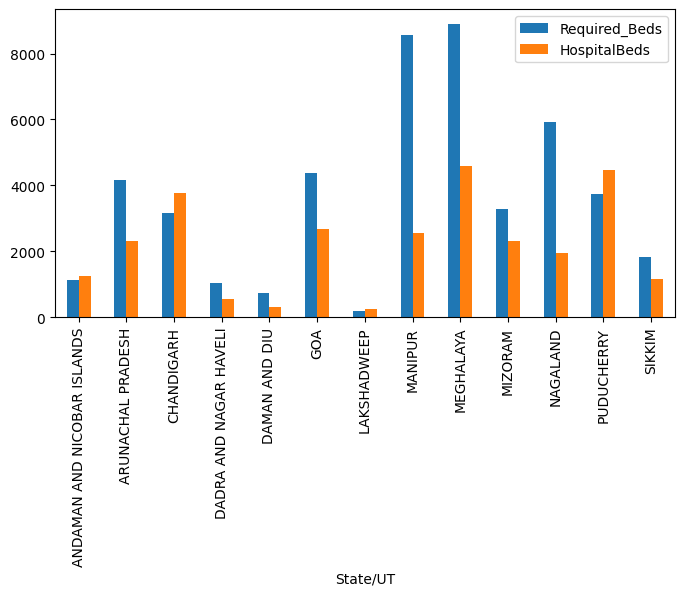

In [15]:
df_x[['Required_Beds','HospitalBeds','State/UT']].plot(kind='bar',x='State/UT',figsize=(8,4))

<Axes: xlabel='State/UT'>

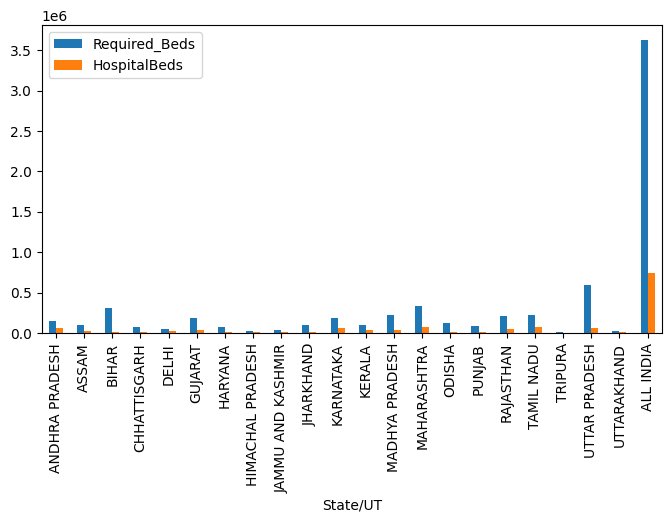

In [16]:
df_y[['Required_Beds','HospitalBeds','State/UT']].iloc[:23].plot(kind='bar',x='State/UT',figsize=(8,4))

IndexError: index 0 is out of bounds for axis 0 with size 0

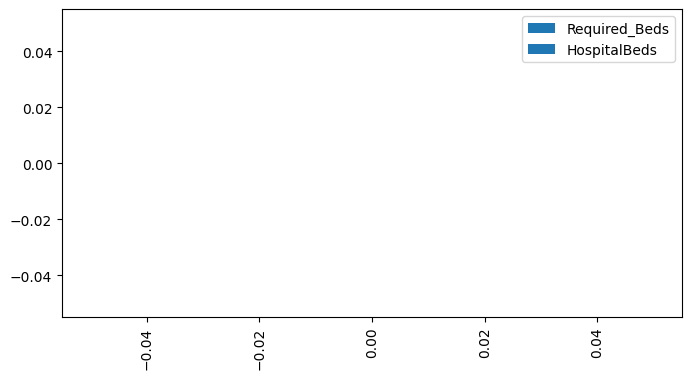

In [17]:
df_y[['Required_Beds','HospitalBeds','State/UT']].iloc[23:].plot(kind='bar',x='State/UT',figsize=(8,4))

In [ ]:
# Problem Statement 17: (Hospitals required to meet the standards)
# In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all 
# by itself how many government hospitals may be required in each state or union territory as well as at the national level?

# Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards 
# in the region, and round the number to the nearest integer to find the value.

# Represent the findings visually.